## Annexe

In [145]:
def calculate_price_metrics(df):
    """
    Calculate price difference, percentage increase, and CAGR between 2021 and 2025.
    """
    df['Price Difference'] = df['price_USD_2025'] - df['price_USD_2021']
    df['Increase Rate (%)'] = ((df['price_USD_2025'] - df['price_USD_2021']) / df['price_USD_2021']) * 100
    df['CAGR (%)'] = ((df['price_USD_2025'] / df['price_USD_2021']) ** (1/4) - 1) * 100
    return df

In [240]:
def get_extreme_products(df):
    """
    Identify the products with the highest and lowest increase rate.
    """
    product_highest_increase_rate = df[
    df['Increase Rate (%)'] == df['Increase Rate (%)'].max()
    ].reset_index(drop=True)
    product_lowest_increase_rate = df[
    df['Increase Rate (%)'] == df['Increase Rate (%)'].min()
    ].reset_index(drop=True)
    
    return product_highest_increase_rate, product_lowest_increase_rate

In [192]:
def count_increase_directions(df):
    """
    Count the number of products with positive and negative increase rates.
    """
    positive_increase = df[df['Increase Rate (%)'] >= 0]
    count_positive_increase = positive_increase.shape[0]
    negative_increase = df[df['Increase Rate (%)'] < 0]
    count_negative_increase = negative_increase.shape[0]
    return positive_increase, count_positive_increase, negative_increase, count_negative_increase

In [206]:
def group_metrics_by_country(df):
    """
    Group the data by 'collection' and 'reference' for a specified country and calculate the mean and median.
    """
    
    metrics = ['price_USD_2021', 'price_USD_2025', 'Price Difference', 'Increase Rate (%)', 'CAGR (%)']
    
    grouped_mean = df.groupby(['collection', 'reference'])[metrics].mean().reset_index()
    grouped_median = df.groupby(['collection', 'reference'])[metrics].median().reset_index()
    return grouped_mean, grouped_median

In [428]:
def describe_country(data, country=None):
    """
    Describe the country data.

    Parameters:
    data (pd.DataFrame): The data to describe.
    country (str, optional): The country to filter by. Defaults to None.

    Returns:
    tuple: A tuple containing the number of rows, unique collections, top collection, unique references, top reference, and a list of unique collections.
    """
    if country:
        data = data[data['country'] == country]
        
    # Extract required details directly from the original data
    number_unique_collections = data['collection'].nunique()
    top_collection = data['collection'].mode()[0]
    
    number_unique_references = len(set(data['reference'].values))
    top_reference = data['reference'].mode()[0]
    
    collection_list = data['collection'].unique()
    
    return number_unique_collections, top_collection, number_unique_references, top_reference, collection_list


In [384]:
def collection_visualization(data, country=None):
    """
    Visualize the collection data.

    Parameters:
    data (pd.DataFrame): The data to visualize.
    country (str): The country to filter by.

    Returns:
    None
    """
    # Filter the original data if a specific country is provided
    if country:
        data = data[data["country"] == country]
    
    # Choose a color palette
    palette = sns.color_palette("pastel")  # You can choose different palettes like "deep", "pastel", etc.

    # Create the count plot
    ax = sns.countplot(x="collection", data=data, palette=palette)

    # Add the count value on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Labels and title
    plt.xlabel("Collection")
    plt.ylabel("Watch Count")
    plt.title(f"Watch Count per Collection in {country}")

    # Show the plot
    plt.show()

In [386]:
def analyze_country(data, country=None):
    """
    Analyze the country data.

    Parameters:
    data (pd.DataFrame): The data to analyze.
    country (str, optional): The country to filter by. Defaults to None.

    Returns:
    tuple: A tuple containing the overall statistics and the collection statistics.
    """
    # Filter the original data if a specific country is provided
    if country:
        data = data[data["country"] == country]
    
    # Identify the cheapest and most expensive product in the whole subset
    cheapest_product_data = data.nsmallest(1, 'price')
    most_expensive_product_data = data.nlargest(1, 'price')
    
    overall_stats = {
        "cheapest": {
            "collection": cheapest_product_data['collection'].values[0],
            "reference": cheapest_product_data['reference'].values[0],
            "price": cheapest_product_data['price'].values[0]
        },
        "most_expensive": {
            "collection": most_expensive_product_data['collection'].values[0],
            "reference": most_expensive_product_data['reference'].values[0],
            "price": most_expensive_product_data['price'].values[0]
        }
    }
    
    # Identify the cheapest and most expensive product per collection
    collection_stats = []
    unique_collections = data["collection"].unique()
    
    for collection in unique_collections:
        collection_data = data[data["collection"] == collection]
        
        cheapest_collection_data = collection_data.nsmallest(1, 'price')
        most_expensive_collection_data = collection_data.nlargest(1, 'price')
        
        collection_stats.append({
            "collection": collection,
            "cheapest": {
                "reference": cheapest_collection_data['reference'].values[0],
                "price": cheapest_collection_data['price'].values[0]
            },
            "most_expensive": {
                "reference": most_expensive_collection_data['reference'].values[0],
                "price": most_expensive_collection_data['price'].values[0]
            }
        })
    
    return overall_stats, collection_stats

# 1. Import librariries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

# 2. Load & Read the Data

In [159]:
data_2021 = pd.read_csv(r"../data/silver/PANERAI_DATA_2021.csv")
data_2021.head()

,brand,url,image_url,collection,reference,price,currency,country,year,price_EUR,price_GBP,price_USD,price_JPY
0,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/10...,RADIOMIR,PAM00655,9700.0,EUR,France,2021,9700.0,8009.29,10074.42,1516928.68
1,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00628,11600.0,EUR,France,2021,11600.0,9578.12,12047.76,1814059.04
2,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00657,11400.0,EUR,France,2021,11400.0,9412.98,11840.04,1782782.16
3,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM00661,11900.0,EUR,France,2021,11900.0,9825.83,12359.34,1860974.36
4,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM01312,7900.0,EUR,France,2021,7900.0,6523.03,8204.94,1235436.76


In [160]:
data_2025 = pd.read_csv(r"../data/silver/2025-03-02_00-24-15/PANERAI_DATA_2025.csv")
data_2025.head()

,currency,brand,country,reference,year,product_url,image_url,price,collection,name,availability,currency_code,price_USD,price_GBP,price_EUR,price_JPY
0,$,PANERAI,USA,PAM01570,2025,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/km...,6000,Radiomir,Radiomir Quaranta,Available,USD,6000.0,4764.0,5776.80,903423.0
1,$,PANERAI,USA,PAM01571,2025,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/Ot...,6000,Radiomir,Radiomir Quaranta,Out of Stock,USD,6000.0,4764.0,5776.80,903423.0
2,$,PANERAI,USA,PAM01572,2025,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/lz...,6000,Radiomir,Radiomir Quaranta,Available,USD,6000.0,4764.0,5776.80,903423.0
3,$,PANERAI,USA,PAM01573,2025,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/iY...,6000,Radiomir,Radiomir Quaranta,Available,USD,6000.0,4764.0,5776.80,903423.0
4,$,PANERAI,USA,PAM01385,2025,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/bc...,5400,Radiomir,Radiomir Officine,Out of Stock,USD,5400.0,4287.6,5199.12,813080.7


# 3. Data and Business Analysis

## 3.1. Commun products since 2021

In [461]:
data_2021_2025 = pd.merge(data_2025, data_2021, on='reference', how='inner')
data_2021_2025 = data_2021_2025.rename(columns={'brand_x': 'brand' ,'country_x': 'country', 'collection_x': 'collection', 'price_USD_x': 'price_USD_2025', 'price_USD_y': 'price_USD_2021'})
data_2021_2025 = data_2021_2025[['brand', 'country', 'reference', 'collection', 'name', 'availability', 'price_USD_2021', 'price_USD_2025']]

data_2021_2025.head()

,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025
0,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,5089.140,5600.00
1,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,5415.420,5600.00
2,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,4090.856,5600.00
3,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,6400.000,5600.00
4,PANERAI,France,PAM01086,Luminor,Luminor Base Logo,Available,5089.140,5920.02


### 3.1.1. Calculate Price Metrics

In [462]:
data_2021_2025 = calculate_price_metrics(data_2021_2025)

In [463]:
data_2021_2025.head()

,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,5089.140,5600.00,510.860,10.038238,2.420268
1,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,5415.420,5600.00,184.580,3.408415,0.841424
2,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,4090.856,5600.00,1509.144,36.890665,8.166670
3,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,6400.000,5600.00,-800.000,-12.500000,-3.283179
4,PANERAI,France,PAM01086,Luminor,Luminor Base Logo,Available,5089.140,5920.02,830.880,16.326531,3.853155


In [464]:
positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {len(set(data_2021_2025['reference'].values))}")
print(f"Total of Products with a positive increase rate: {count_positive_increase}")
print(f"Total Products with a negative increase rate: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 31
Total of Products with a positive increase rate: 337
Total Products with a negative increase rate: 151



In [352]:
print("Product with Positive Increase Rate:")
positive_increase.head()

Product with Positive Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,5089.140,5600.00,510.860,10.038238,2.420268
1,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,5415.420,5600.00,184.580,3.408415,0.841424
2,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,4090.856,5600.00,1509.144,36.890665,8.166670
4,PANERAI,France,PAM01086,Luminor,Luminor Base Logo,Available,5089.140,5920.02,830.880,16.326531,3.853155
5,PANERAI,France,PAM01086,Luminor,Luminor Base Logo,Available,5415.420,5920.02,504.600,9.317837,2.252223


In [212]:
print("Product with Negative Increase Rate:")
negative_increase.head()

Product with Negative Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
3,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,6400.0,5600.000,-800.000,-12.500000,-3.283179
7,PANERAI,France,PAM01086,Luminor,Luminor Base Logo,Available,6400.0,5920.020,-479.980,-7.499687,-1.930085
11,PANERAI,UK,PAM01086,Luminor,Luminor Base Logo,Available,6400.0,6171.060,-228.940,-3.577187,-0.906550
15,PANERAI,Japan,PAM01086,Luminor,ルミノール ベース ロゴ,Available,6400.0,5624.927,-775.073,-12.110516,-3.175730
19,PANERAI,USA,PAM01084,Luminor,Luminor Logo,Available,7100.0,6100.000,-1000.000,-14.084507,-3.724037


### 3.1.2. Identify Products with Extreme Growth Rates

In [465]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025)

In [466]:
# Product with the highest increase rate
print("Product with the Highest Increase Rate:")
product_highest_increase_rate.head()

Product with the Highest Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,UK,PAM01250,Luminor Due,Luminor Due,Available,5186.621,7934.22,2747.599,52.97474,11.21284


In [469]:
# Product with the lowest increase rate
print("\nProduct with the Lowest Increase Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,USA,PAM00715,Luminor,Luminor Perpetual Calendar GMT Platinumtech™,Out of Stock,85900.0,62400.0,-23500.0,-27.357392,-7.679562


### 3.1.3. Count Products by Increase Direction

In [470]:
data_2021_2025_grouped_mean, data_2021_2025_grouped_median = group_metrics_by_country(data_2021_2025)

In [471]:
print(f"\nGrouped Mean Metrics by Collection and Reference:")
data_2021_2025_grouped_mean.head()


Grouped Mean Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10447.960250,11727.23125,1279.271000,15.253328,3.339056
1,Luminor,PAM00670,21771.503333,24905.52750,3134.024167,16.111819,3.644237
2,Luminor,PAM00715,70956.264250,67742.08650,-3214.177750,-1.904841,-0.792197
3,Luminor,PAM00742,49400.320000,48953.25450,-447.065500,1.805850,0.134566
4,Luminor,PAM00914,6117.883333,7336.55175,1218.668417,21.761419,4.879201


In [472]:
print(f"\nGrouped Median Metrics by Collection and Reference:")
data_2021_2025_grouped_median.head()


Grouped Median Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10441.59,11633.4025,1191.8125,11.409950,2.737952
1,Luminor,PAM00670,22745.34,24776.2650,2231.7600,9.563016,2.305246
2,Luminor,PAM00715,71677.98,66894.5730,-4783.4070,-6.719326,-1.725066
3,Luminor,PAM00742,49957.38,48352.9090,-1604.4710,-3.257661,-0.825659
4,Luminor,PAM00914,6439.32,7288.9600,960.0900,14.545998,3.451598


### 3.1.4 Analysis for a given country

#### 3.1.4.1. France

In [473]:
country = "France"

data_2021_2025_country = data_2021_2025[data_2021_2025['country'] == country]

In [474]:
positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025_country)
positive_increase.reset_index(drop=True, inplace=True)
negative_increase.reset_index(drop=True, inplace=True)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {data_2021_2025_country.shape[0]}")
print(f"Total of Products with a positive increase rate: {count_positive_increase}")
print(f"Total Products with a negative increase rate: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 122
Total of Products with a positive increase rate: 92
Total Products with a negative increase rate: 30



In [475]:
print("Product with Positive Increase Rate:")
positive_increase.head()

Product with Positive Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,France,PAM01086,Luminor,Luminor Base Logo,Available,5089.140,5920.02,830.880,16.326531,3.853155
1,PANERAI,France,PAM01086,Luminor,Luminor Base Logo,Available,5415.420,5920.02,504.600,9.317837,2.252223
2,PANERAI,France,PAM01086,Luminor,Luminor Base Logo,Available,4090.856,5920.02,1829.164,44.713478,9.679950
3,PANERAI,France,PAM01084,Luminor,Luminor Logo,Available,5608.440,6439.32,830.880,14.814815,3.514093
4,PANERAI,France,PAM01084,Luminor,Luminor Logo,Available,6045.120,6439.32,394.200,6.520962,1.591827


In [476]:
print("Product with Negative Increase Rate:")
negative_increase.head()

Product with Negative Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,France,PAM01086,Luminor,Luminor Base Logo,Available,6400.0,5920.02,-479.98,-7.499687,-1.930085
1,PANERAI,France,PAM01084,Luminor,Luminor Logo,Available,7100.0,6439.32,-660.68,-9.305352,-2.412225
2,PANERAI,France,PAM01085,Luminor,Luminor Logo,Available,7100.0,6439.32,-660.68,-9.305352,-2.412225
3,PANERAI,France,PAM00915,Luminor,Luminor 8 Giorni,Available,8800.0,7997.22,-802.78,-9.122500,-2.363075
4,PANERAI,France,PAM00422,Luminor,Luminor Marina,Available,12800.0,11943.90,-856.10,-6.688281,-1.715723


#### Identify Products with Extreme Growth Rates

In [477]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025_country)

In [478]:
# Product with the highest increase rate
print("Product with the Highest Increase Rate:")
product_highest_increase_rate.head()

Product with the Highest Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,France,PAM01250,Luminor Due,Luminor Due,Available,5186.621,7685.64,2499.019,48.182024,10.331337


In [479]:
# Product with the lowest increase rate
print("\nProduct with the Lowest Increase Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,France,PAM00715,Luminor,Luminor Perpetual Calendar GMT Platinumtech™,Available,85900.0,74779.2,-11120.8,-12.946217,-3.40672


#### Count Products by Increase Direction

In [480]:
data_2021_2025_grouped_mean, data_2021_2025_grouped_median = group_metrics_by_country(data_2021_2025_country)

In [248]:
print(f"\nGrouped Mean Metrics by Collection and Reference:")
data_2021_2025_grouped_mean.head()


Grouped Mean Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10447.960250,11943.90,1495.939750,17.382713,3.826666
1,Luminor,PAM00670,21771.503333,25445.70,3674.196667,18.630152,4.213893
2,Luminor,PAM00715,70956.264250,74779.20,3822.935750,8.285379,1.744495
3,Luminor,PAM00742,49400.320000,54007.20,4606.880000,12.316310,2.679471
4,Luminor,PAM00914,6117.883333,7477.92,1360.036667,24.107644,5.392628


In [249]:
print(f"\nGrouped Median Metrics by Collection and Reference:")
data_2021_2025_grouped_median.head()


Grouped Median Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10441.59,11943.90,1502.31,14.460539,3.427981
1,Luminor,PAM00670,22745.34,25445.70,2700.36,11.872146,2.844363
2,Luminor,PAM00715,71677.98,74779.20,3101.22,4.525965,1.094685
3,Luminor,PAM00742,49957.38,54007.20,4049.82,8.313137,1.998213
4,Luminor,PAM00914,6439.32,7477.92,1038.60,16.129032,3.809046


#### 3.1.4.2. USA

In [557]:
country = "USA"

data_2021_2025_country = data_2021_2025[data_2021_2025['country'] == country]

In [493]:
positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025_country)
positive_increase.reset_index(drop=True, inplace=True)
negative_increase.reset_index(drop=True, inplace=True)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {data_2021_2025_country.shape[0]}")
print(f"Total of Products with a positive increase rate: {count_positive_increase}")
print(f"Total Products with a negative increase rate: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 122
Total of Products with a positive increase rate: 76
Total Products with a negative increase rate: 46



In [494]:
print("Product with Positive Increase Rate:")
positive_increase.head()

Product with Positive Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,5089.140,5600.0,510.860,10.038238,2.420268
1,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,5415.420,5600.0,184.580,3.408415,0.841424
2,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,4090.856,5600.0,1509.144,36.890665,8.166670
3,PANERAI,USA,PAM01084,Luminor,Luminor Logo,Available,5608.440,6100.0,491.560,8.764648,2.122618
4,PANERAI,USA,PAM01084,Luminor,Luminor Logo,Available,6045.120,6100.0,54.880,0.907840,0.226191


In [495]:
print("Product with Negative Increase Rate:")
negative_increase.head()

Product with Negative Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,USA,PAM01086,Luminor,Luminor Base Logo,Available,6400.0,5600.0,-800.0,-12.500000,-3.283179
1,PANERAI,USA,PAM01084,Luminor,Luminor Logo,Available,7100.0,6100.0,-1000.0,-14.084507,-3.724037
2,PANERAI,USA,PAM01085,Luminor,Luminor Logo,Available,7100.0,6100.0,-1000.0,-14.084507,-3.724037
3,PANERAI,USA,PAM00915,Luminor,Luminor 8 Giorni,Available,8800.0,7600.0,-1200.0,-13.636364,-3.598736
4,PANERAI,USA,PAM00422,Luminor,Luminor Marina,Out of Stock,12800.0,11300.0,-1500.0,-11.718750,-3.068012


#### Identify Products with Extreme Growth Rates

In [496]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025_country)

In [497]:
# Product with the highest increase rate
print("Product with the Highest Increase Rate:")
product_highest_increase_rate.head()

Product with the Highest Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,USA,PAM01250,Luminor Due,Luminor Due,Available,5186.621,7300.0,2113.379,40.746741,8.92049


In [498]:
# Product with the lowest increase rate
print("\nProduct with the Lowest Increase Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,USA,PAM00715,Luminor,Luminor Perpetual Calendar GMT Platinumtech™,Out of Stock,85900.0,62400.0,-23500.0,-27.357392,-7.679562


#### Count Products by Increase Direction

In [499]:
data_2021_2025_grouped_mean, data_2021_2025_grouped_median = group_metrics_by_country(data_2021_2025_country)

In [500]:
print(f"\nGrouped Mean Metrics by Collection and Reference:")
data_2021_2025_grouped_mean.head()


Grouped Mean Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10447.960250,11300.0,852.039750,11.054568,2.398119
1,Luminor,PAM00670,21771.503333,24000.0,2228.496667,11.890168,2.701037
2,Luminor,PAM00715,70956.264250,62400.0,-8556.264250,-9.640547,-2.756213
3,Luminor,PAM00742,49400.320000,45100.0,-4300.320000,-6.207587,-1.844454
4,Luminor,PAM00914,6117.883333,7100.0,982.116667,17.835477,4.035035


In [501]:
print(f"\nGrouped Median Metrics by Collection and Reference:")
data_2021_2025_grouped_median.head()


Grouped Median Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10441.59,11300.0,858.41,8.289930,2.004920
1,Luminor,PAM00670,22745.34,24000.0,1254.66,5.516119,1.351388
2,Luminor,PAM00715,71677.98,62400.0,-9277.98,-12.777615,-3.377278
3,Luminor,PAM00742,49957.38,45100.0,-4857.38,-9.550532,-2.495697
4,Luminor,PAM00914,6439.32,7100.0,660.68,10.260090,2.471852


#### 3.1.4.3. UK

In [511]:
country = "UK"

data_2021_2025_country = data_2021_2025[data_2021_2025['country'] == country]

In [513]:
positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025_country)
positive_increase.reset_index(drop=True, inplace=True)
negative_increase.reset_index(drop=True, inplace=True)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {data_2021_2025_country.shape[0]}")
print(f"Total of Products with a positive increase rate: {count_positive_increase}")
print(f"Total Products with a negative increase rate: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 122
Total of Products with a positive increase rate: 87
Total Products with a negative increase rate: 35



In [514]:
print("Product with Positive Increase Rate:")
positive_increase.head()

Product with Positive Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,UK,PAM01086,Luminor,Luminor Base Logo,Available,5089.140,6171.06,1081.920,21.259388,4.937048
1,PANERAI,UK,PAM01086,Luminor,Luminor Base Logo,Available,5415.420,6171.06,755.640,13.953488,3.319407
2,PANERAI,UK,PAM01086,Luminor,Luminor Base Logo,Available,4090.856,6171.06,2080.204,50.850091,10.824657
3,PANERAI,UK,PAM01084,Luminor,Luminor Logo,Available,5608.440,6674.82,1066.380,19.013843,4.447818
4,PANERAI,UK,PAM01084,Luminor,Luminor Logo,Available,6045.120,6674.82,629.700,10.416667,2.508212


In [515]:
print("Product with Negative Increase Rate:")
negative_increase.head()

Product with Negative Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,UK,PAM01086,Luminor,Luminor Base Logo,Available,6400.0,6171.06,-228.94,-3.577187,-0.906550
1,PANERAI,UK,PAM01084,Luminor,Luminor Logo,Available,7100.0,6674.82,-425.18,-5.988451,-1.531958
2,PANERAI,UK,PAM01085,Luminor,Luminor Logo,Available,7100.0,6674.82,-425.18,-5.988451,-1.531958
3,PANERAI,UK,PAM00915,Luminor,Luminor 8 Giorni,Available,8800.0,8186.10,-613.90,-6.976136,-1.791610
4,PANERAI,UK,PAM00422,Luminor,Luminor Marina,Available,12800.0,12342.12,-457.88,-3.577187,-0.906550


#### Identify Products with Extreme Growth Rates

In [516]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025_country)

In [517]:
# Product with the highest increase rate
print("Product with the Highest Increase Rate:")
product_highest_increase_rate.head()

Product with the Highest Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,UK,PAM01250,Luminor Due,Luminor Due,Available,5186.621,7934.22,2747.599,52.97474,11.21284


In [518]:
# Product with the lowest increase rate
print("\nProduct with the Lowest Increase Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,UK,PAM00715,Luminor,Luminor Perpetual Calendar GMT Platinumtech™,Out of Stock,85900.0,63221.88,-22678.12,-26.400605,-7.37706


#### Count Products by Increase Direction

In [519]:
data_2021_2025_grouped_mean, data_2021_2025_grouped_median = group_metrics_by_country(data_2021_2025_country)

In [520]:
print(f"\nGrouped Mean Metrics by Collection and Reference:")
data_2021_2025_grouped_mean.head()


Grouped Mean Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10447.960250,12342.12,1894.159750,21.296355,4.681469
1,Luminor,PAM00670,21771.503333,26069.58,4298.076667,21.538737,4.846884
2,Luminor,PAM00715,70956.264250,63221.88,-7734.384250,-8.450408,-2.437579
3,Luminor,PAM00742,49400.320000,45716.22,-3684.100000,-4.926063,-1.510874
4,Luminor,PAM00914,6117.883333,7682.34,1564.456667,27.500310,6.105626


In [521]:
print(f"\nGrouped Median Metrics by Collection and Reference:")
data_2021_2025_grouped_median.head()


Grouped Median Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10441.59,12342.12,1900.53,18.276753,4.279502
1,Luminor,PAM00670,22745.34,26069.58,3324.24,14.615038,3.469035
2,Luminor,PAM00715,71677.98,63221.88,-8456.10,-11.628795,-3.060680
3,Luminor,PAM00742,49957.38,45716.22,-4241.16,-8.314684,-2.164330
4,Luminor,PAM00914,6439.32,7682.34,1243.02,19.303591,4.511331


#### 3.1.4.4. Japan

In [522]:
country = "Japan"

data_2021_2025_country = data_2021_2025[data_2021_2025['country'] == country]

In [523]:
positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025_country)
positive_increase.reset_index(drop=True, inplace=True)
negative_increase.reset_index(drop=True, inplace=True)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {data_2021_2025_country.shape[0]}")
print(f"Total of Products with a positive increase rate: {count_positive_increase}")
print(f"Total Products with a negative increase rate: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 122
Total of Products with a positive increase rate: 82
Total Products with a negative increase rate: 40



In [524]:
print("Product with Positive Increase Rate:")
positive_increase.head()

Product with Positive Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,Japan,PAM01086,Luminor,ルミノール ベース ロゴ,Available,5089.140,5624.927,535.787,10.528046,2.534053
1,PANERAI,Japan,PAM01086,Luminor,ルミノール ベース ロゴ,Available,5415.420,5624.927,209.507,3.868712,0.953455
2,PANERAI,Japan,PAM01086,Luminor,ルミノール ベース ロゴ,Available,4090.856,5624.927,1534.071,37.500000,8.286839
3,PANERAI,Japan,PAM01084,Luminor,ルミノール ロゴ,Available,5608.440,6136.284,527.844,9.411601,2.274142
4,PANERAI,Japan,PAM01084,Luminor,ルミノール ロゴ,Available,6045.120,6136.284,91.164,1.508059,0.374901


In [525]:
print("Product with Negative Increase Rate:")
negative_increase.head()

Product with Negative Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,Japan,PAM01086,Luminor,ルミノール ベース ロゴ,Available,6400.0,5624.927,-775.073,-12.110516,-3.175730
1,PANERAI,Japan,PAM01084,Luminor,ルミノール ロゴ,Available,7100.0,6136.284,-963.716,-13.573465,-3.581188
2,PANERAI,Japan,PAM01085,Luminor,Luminor Logo,Available,7100.0,6136.284,-963.716,-13.573465,-3.581188
3,PANERAI,Japan,PAM00915,Luminor,ルミノール ベース,Available,8800.0,7597.304,-1202.696,-13.667000,-3.607286
4,PANERAI,Japan,PAM00422,Luminor,ルミノール マリーナ,Available,12800.0,11322.905,-1477.095,-11.539805,-3.018930


#### Identify Products with Extreme Growth Rates

In [526]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025_country)

In [527]:
# Product with the highest increase rate
print("Product with the Highest Increase Rate:")
product_highest_increase_rate.head()

Product with the Highest Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,Japan,PAM01250,Luminor Due,ルミノール ドゥエ,Available,5186.621,7305.1,2118.479,40.84507,8.939509


In [528]:
# Product with the lowest increase rate
print("\nProduct with the Lowest Increase Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Increase Rate:


,brand,country,reference,collection,name,availability,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,PANERAI,Japan,PAM00715,Luminor,Luminor Perpetual Calendar GMT Platinumtech™,Out of Stock,85900.0,70567.266,-15332.734,-17.849516,-4.796584


#### Count Products by Increase Direction

In [529]:
data_2021_2025_grouped_mean, data_2021_2025_grouped_median = group_metrics_by_country(data_2021_2025_country)

In [530]:
print(f"\nGrouped Mean Metrics by Collection and Reference:")
data_2021_2025_grouped_mean.head()


Grouped Mean Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10447.960250,11322.905,874.944750,11.279675,2.449970
1,Luminor,PAM00670,21771.503333,24106.830,2335.326667,12.388219,2.815134
2,Luminor,PAM00715,70956.264250,70567.266,-388.998250,2.186211,0.280511
3,Luminor,PAM00742,49400.320000,50989.598,1589.278000,6.040741,1.214120
4,Luminor,PAM00914,6117.883333,7085.947,968.063667,17.602246,3.983517


In [531]:
print(f"\nGrouped Median Metrics by Collection and Reference:")
data_2021_2025_grouped_median.head()


Grouped Median Metrics by Collection and Reference:


,collection,reference,price_USD_2021,price_USD_2025,Price Difference,Increase Rate (%),CAGR (%)
0,Luminor,PAM00422,10441.59,11322.905,881.315,8.509432,2.056571
1,Luminor,PAM00670,22745.34,24106.830,1361.490,5.985798,1.463986
2,Luminor,PAM00715,71677.98,70567.266,-1110.714,-1.361454,-0.359949
3,Luminor,PAM00742,49957.38,50989.598,1032.218,2.261242,0.542584
4,Luminor,PAM00914,6439.32,7085.947,646.627,10.041852,2.421109


### 3.2. From 2021 to 2025: Products That Vanished

In [429]:
data_2021_only = data_2021[~data_2021['reference'].isin(data_2025['reference'])]

data_2021_only.head()

,brand,url,image_url,collection,reference,price,currency,country,year,price_EUR,price_GBP,price_USD,price_JPY
0,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/10...,RADIOMIR,PAM00655,9700.0,EUR,France,2021,9700.0,8009.29,10074.42,1516928.68
1,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00628,11600.0,EUR,France,2021,11600.0,9578.12,12047.76,1814059.04
2,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00657,11400.0,EUR,France,2021,11400.0,9412.98,11840.04,1782782.16
3,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM00661,11900.0,EUR,France,2021,11900.0,9825.83,12359.34,1860974.36
5,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM01499,7900.0,EUR,France,2021,7900.0,6523.03,8204.94,1235436.76


In [430]:
stats = data_2021_only.describe(include="object")

In [532]:
number_unique_collections, top_collection, number_unique_references, top_reference, collection_list = describe_country(data_2021_only)

print("Overall Summary:\n")
print(f"Total Number of Products from 2021 No Longer Available: {number_unique_references}")

if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    # Use the original data for lookup, not the summary!
    collection_for_top_reference = data_2021_only[data_2021_only['reference'] == top_reference]['collection'].iloc[0]
    print(f"\nWe have a total of {number_unique_references} distinct products, with {top_reference} leading the selection from the {collection_for_top_reference} collection")


Overall Summary:

Total Number of Products from 2021 No Longer Available: 176

We have 4 collections, and LUMINOR is the leading one

Catalog of Collections:
1. RADIOMIR
2. LUMINOR
3. SUBMERSIBLE
4. LUMINOR-DUE

We have a total of 176 distinct products, with PAM00233 leading the selection from the LUMINOR collection


In [533]:
# Countries
number_unique_countries, top_country = stats["country"].unique()[1], stats["country"].unique()[2]
if number_unique_countries == 1:
    print(f"Our study is applied to a unique country, {top_country}")
else:
    print(f"Our study is applied to {number_unique_countries} countries, with {top_country} being the top one")

Our study is applied to 4 countries, with Japan being the top one


In [534]:
countries_list = data_2021_only["country"].unique()

print("Countries Included in the Study:\n")
for i in range(len(countries_list)):
    print(f"\t{i+1}. {countries_list[i]}")

Countries Included in the Study:

	1. France
	2. UK
	3. Japan
	4. USA


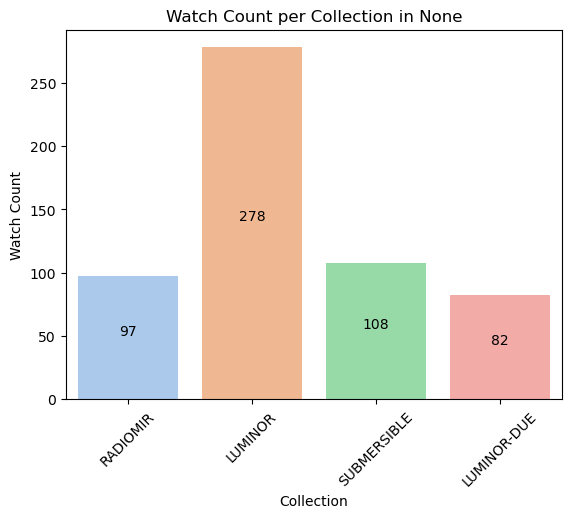

In [535]:
collection_visualization(data_2021_only)

#### 3.2.1. Analysis for a given country

#### 3.2.1.1. France

In [536]:
country = "France"

In [537]:
number_unique_collections, top_collection, number_unique_references, top_reference, collection_list = describe_country(data_2021_only, country)

print("Overall Summary:\n")
print(f"Total Number of Products from 2021 No Longer Available: {number_unique_references}")

if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    # Use the original data for lookup, not the summary!
    collection_for_top_reference = data_2021_only[data_2021_only['reference'] == top_reference]['collection'].iloc[0]
    print(f"\nWe have a total of {number_unique_references} distinct products, with {top_reference} leading the selection from the {collection_for_top_reference} collection")


Overall Summary:

Total Number of Products from 2021 No Longer Available: 122

We have 4 collections, and LUMINOR is the leading one

Catalog of Collections:
1. RADIOMIR
2. LUMINOR
3. SUBMERSIBLE
4. LUMINOR-DUE

We have a total of 122 distinct products, with PAM00233 leading the selection from the LUMINOR collection


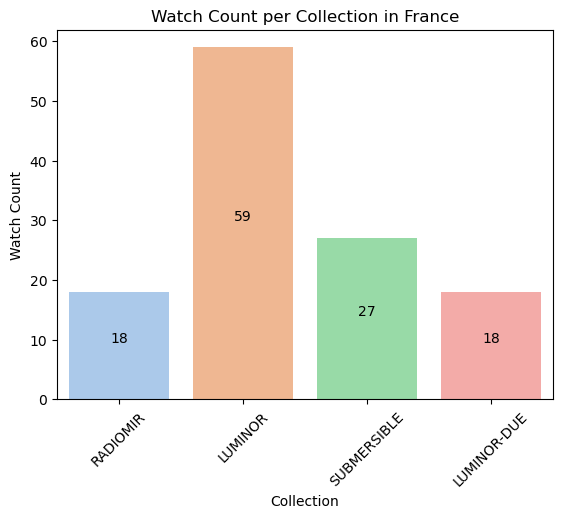

In [538]:
collection_visualization(data_2021_only, country)

In [539]:
overall_stats, collection_stats = analyze_country(data_2021_only, country)

#### Identify the cheapest and most expensive product in the whole subset

In [540]:
print(f"\nCheapest and most expensive product in {country}:")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")


Cheapest and most expensive product in France:
  Cheapest -> Collection: RADIOMIR, Reference: PAM00753, Price: 4400.0 EUR
  Most Expensive -> Collection: SUBMERSIBLE, Reference: PAM01108, Price: 190000.0 EUR


#### Identify the cheapest and most expensive product per collection

In [541]:
for stat in collection_stats:
    print(f"Collection: {stat['collection']}")
    print(f"  Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print(f"  Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print("\n"+"-"*50+"\n")

Collection: RADIOMIR
  Cheapest -> Reference: PAM00753, Price: 4400.0 EUR
  Most Expensive -> Reference: PAM00997, Price: 12900.0 EUR

--------------------------------------------------

Collection: LUMINOR
  Cheapest -> Reference: PAM00774, Price: 4900.0 EUR
  Most Expensive -> Reference: PAM00768, Price: 145000.0 EUR

--------------------------------------------------

Collection: SUBMERSIBLE
  Cheapest -> Reference: PAM00973, Price: 8700.0 EUR
  Most Expensive -> Reference: PAM01108, Price: 190000.0 EUR

--------------------------------------------------

Collection: LUMINOR-DUE
  Cheapest -> Reference: PAM00755, Price: 6100.0 EUR
  Most Expensive -> Reference: PAM00741, Price: 21500.0 EUR

--------------------------------------------------



#### 3.2.1.2. USA

In [558]:
country = "USA"

In [543]:
number_unique_collections, top_collection, number_unique_references, top_reference, collection_list = describe_country(data_2021_only, country)

print("Overall Summary:\n")
print(f"Total Number of Products from 2021 No Longer Available: {number_unique_references}")

if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    # Use the original data for lookup, not the summary!
    collection_for_top_reference = data_2021_only[data_2021_only['reference'] == top_reference]['collection'].iloc[0]
    print(f"\nWe have a total of {number_unique_references} distinct products, with {top_reference} leading the selection from the {collection_for_top_reference} collection")


Overall Summary:

Total Number of Products from 2021 No Longer Available: 149

We have 4 collections, and LUMINOR is the leading one

Catalog of Collections:
1. RADIOMIR
2. LUMINOR
3. LUMINOR-DUE
4. SUBMERSIBLE

We have a total of 149 distinct products, with PAM00233 leading the selection from the LUMINOR collection


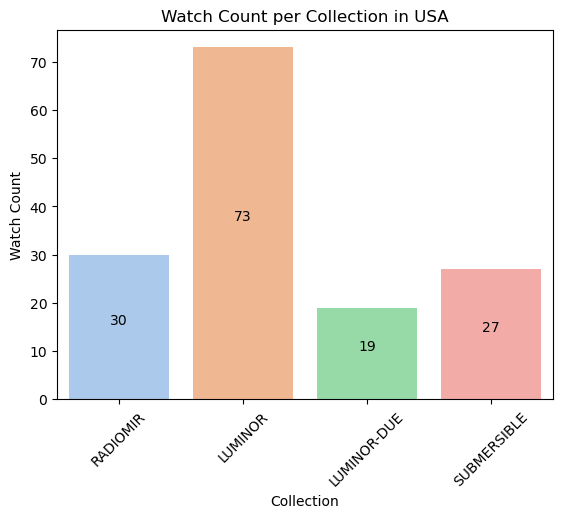

In [544]:
collection_visualization(data_2021_only, country)

In [545]:
overall_stats, collection_stats = analyze_country(data_2021_only, country)

#### Identify the cheapest and most expensive product in the whole subset

In [546]:
print(f"\nCheapest and most expensive product in {country}:")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")


Cheapest and most expensive product in USA:
  Cheapest -> Collection: RADIOMIR, Reference: PAM00753, Price: 5700.0 USD
  Most Expensive -> Collection: SUBMERSIBLE, Reference: PAM01108, Price: 247700.0 USD


#### Identify the cheapest and most expensive product per collection

In [547]:
for stat in collection_stats:
    print(f"Collection: {stat['collection']}")
    print(f"  Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print(f"  Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print("\n"+"-"*50+"\n")

Collection: RADIOMIR
  Cheapest -> Reference: PAM00753, Price: 5700.0 USD
  Most Expensive -> Reference: PAM00515, Price: 27200.0 USD

--------------------------------------------------

Collection: LUMINOR
  Cheapest -> Reference: PAM00773, Price: 6400.0 USD
  Most Expensive -> Reference: PAM00768, Price: 189000.0 USD

--------------------------------------------------

Collection: LUMINOR-DUE
  Cheapest -> Reference: PAM00755, Price: 8000.0 USD
  Most Expensive -> Reference: PAM00675, Price: 32100.0 USD

--------------------------------------------------

Collection: SUBMERSIBLE
  Cheapest -> Reference: PAM00973, Price: 11300.0 USD
  Most Expensive -> Reference: PAM01108, Price: 247700.0 USD

--------------------------------------------------



#### 3.2.1.3. UK

In [559]:
country = "UK"

In [560]:
number_unique_collections, top_collection, number_unique_references, top_reference, collection_list = describe_country(data_2021_only, country)

print("Overall Summary:\n")
print(f"Total Number of Products from 2021 No Longer Available: {number_unique_references}")

if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    # Use the original data for lookup, not the summary!
    collection_for_top_reference = data_2021_only[data_2021_only['reference'] == top_reference]['collection'].iloc[0]
    print(f"\nWe have a total of {number_unique_references} distinct products, with {top_reference} leading the selection from the {collection_for_top_reference} collection")


Overall Summary:

Total Number of Products from 2021 No Longer Available: 124

We have 4 collections, and LUMINOR is the leading one

Catalog of Collections:
1. RADIOMIR
2. LUMINOR
3. LUMINOR-DUE
4. SUBMERSIBLE

We have a total of 124 distinct products, with PAM00233 leading the selection from the LUMINOR collection


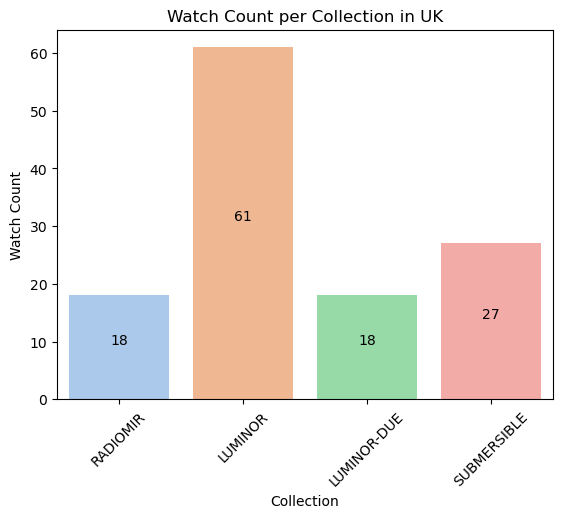

In [561]:
collection_visualization(data_2021_only, country)

In [562]:
overall_stats, collection_stats = analyze_country(data_2021_only, country)

#### Identify the cheapest and most expensive product in the whole subset

In [563]:
print(f"\nCheapest and most expensive product in {country}:")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")


Cheapest and most expensive product in UK:
  Cheapest -> Collection: RADIOMIR, Reference: PAM00753, Price: 3800.0 GBP
  Most Expensive -> Collection: SUBMERSIBLE, Reference: PAM01108, Price: 169900.0 GBP


#### Identify the cheapest and most expensive product per collection

In [564]:
for stat in collection_stats:
    print(f"Collection: {stat['collection']}")
    print(f"  Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print(f"  Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print("\n"+"-"*50+"\n")

Collection: RADIOMIR
  Cheapest -> Reference: PAM00753, Price: 3800.0 GBP
  Most Expensive -> Reference: PAM00997, Price: 11500.0 GBP

--------------------------------------------------

Collection: LUMINOR
  Cheapest -> Reference: PAM00774, Price: 4300.0 GBP
  Most Expensive -> Reference: PAM00768, Price: 130000.0 GBP

--------------------------------------------------

Collection: LUMINOR-DUE
  Cheapest -> Reference: PAM00755, Price: 5500.0 GBP
  Most Expensive -> Reference: PAM00675, Price: 22400.0 GBP

--------------------------------------------------

Collection: SUBMERSIBLE
  Cheapest -> Reference: PAM00973, Price: 7600.0 GBP
  Most Expensive -> Reference: PAM01108, Price: 169900.0 GBP

--------------------------------------------------



#### 3.2.1.4. Japan

In [556]:
country = "Japan"

In [454]:
number_unique_collections, top_collection, number_unique_references, top_reference, collection_list = describe_country(data_2021_only, country)

print("Overall Summary:\n")
print(f"Total Number of Products from 2021 No Longer Available: {number_unique_references}")

if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    # Use the original data for lookup, not the summary!
    collection_for_top_reference = data_2021_only[data_2021_only['reference'] == top_reference]['collection'].iloc[0]
    print(f"\nWe have a total of {number_unique_references} distinct products, with {top_reference} leading the selection from the {collection_for_top_reference} collection")


Overall Summary:

Total Number of Products from 2021 No Longer Available: 170

We have 4 collections, and LUMINOR is the leading one

Catalog of Collections:
1. RADIOMIR
2. LUMINOR
3. LUMINOR-DUE
4. SUBMERSIBLE

We have a total of 170 distinct products, with PAM00233 leading the selection from the LUMINOR collection


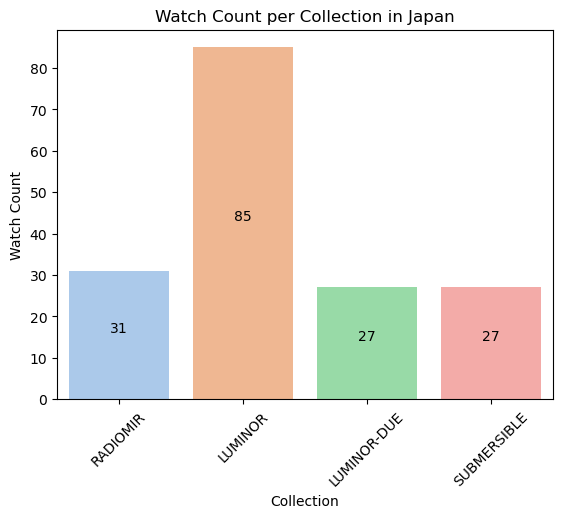

In [455]:
collection_visualization(data_2021_only, country)

In [456]:
overall_stats, collection_stats = analyze_country(data_2021_only, country)

#### Identify the cheapest and most expensive product in the whole subset

In [457]:
print(f"\nCheapest and most expensive product in {country}:")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")


Cheapest and most expensive product in Japan:
  Cheapest -> Collection: RADIOMIR, Reference: PAM00753, Price: 550000.0 JPY
  Most Expensive -> Collection: LUMINOR, Reference: PAM00768, Price: 18029000.0 JPY


#### Identify the cheapest and most expensive product per collection

In [458]:
for stat in collection_stats:
    print(f"Collection: {stat['collection']}")
    print(f"  Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print(f"  Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data_2021_only['currency'][data_2021_only['country'] == country]).unique()[0]}")
    print("\n"+"-"*50+"\n")

Collection: RADIOMIR
  Cheapest -> Reference: PAM00753, Price: 550000.0 JPY
  Most Expensive -> Reference: PAM00515, Price: 2618000.0 JPY

--------------------------------------------------

Collection: LUMINOR
  Cheapest -> Reference: PAM00773, Price: 616000.0 JPY
  Most Expensive -> Reference: PAM00768, Price: 18029000.0 JPY

--------------------------------------------------

Collection: LUMINOR-DUE
  Cheapest -> Reference: PAM00755, Price: 748000.0 JPY
  Most Expensive -> Reference: PAM00675, Price: 3091000.0 JPY

--------------------------------------------------

Collection: SUBMERSIBLE
  Cheapest -> Reference: PAM00973, Price: 1078000.0 JPY
  Most Expensive -> Reference: PAM01225, Price: 7458000.0 JPY

--------------------------------------------------

